In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds1 = xr.open_zarr("../zstores/local-replay-1deg-slurmtest/forecast/fv3.zarr/")
ds2 = xr.open_zarr("../zstores/replay-1deg-slurmtest/forecast/fv3.zarr/")

In [7]:
ds1.time

<xarray.DataArray 'time' (time: 34)>
array(['1993-12-31T18:00:00.000000000', '1993-12-31T21:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1994-01-01T03:00:00.000000000',
       '1994-01-01T06:00:00.000000000', '1994-01-01T09:00:00.000000000',
       '1994-01-01T12:00:00.000000000', '1994-01-01T15:00:00.000000000',
       '1994-01-01T18:00:00.000000000', '1994-01-01T21:00:00.000000000',
       '1994-01-02T00:00:00.000000000', '1994-01-02T03:00:00.000000000',
       '1994-01-02T06:00:00.000000000', '1994-01-02T09:00:00.000000000',
       '1994-01-02T12:00:00.000000000', '1994-01-02T15:00:00.000000000',
       '1994-01-02T18:00:00.000000000', '1994-01-02T21:00:00.000000000',
       '1994-01-03T00:00:00.000000000', '1994-01-03T03:00:00.000000000',
       '1994-01-03T06:00:00.000000000', '1994-01-03T09:00:00.000000000',
       '1994-01-03T12:00:00.000000000', '1994-01-03T15:00:00.000000000',
       '1994-01-03T18:00:00.000000000', '1994-01-03T21:00:00.000000000',
       '1994-01-04T00:00:00.000000000', '1994-01-04T03:00:00.000000000',
       '1994-01-04T06:00:00.000000000', '1994-01-04T09:00:00.000000000',
       '1994-01-04T12:00:00.000000000', '1994-01-04T15:00:00.000000000',
       '1994-01-04T18:00:00.000000000', '1994-01-04T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    cftime   (time) object dask.array<chunksize=(34,), meta=np.ndarray>
    ftime    (time) timedelta64[ns] dask.array<chunksize=(34,), meta=np.ndarray>
  * time     (time) datetime64[ns] 1993-12-31T18:00:00 ... 1994-01-04T21:00:00
Attributes:
    axis:       T
    long_name:  time

In [5]:
ds1.time.values == ds2.time.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

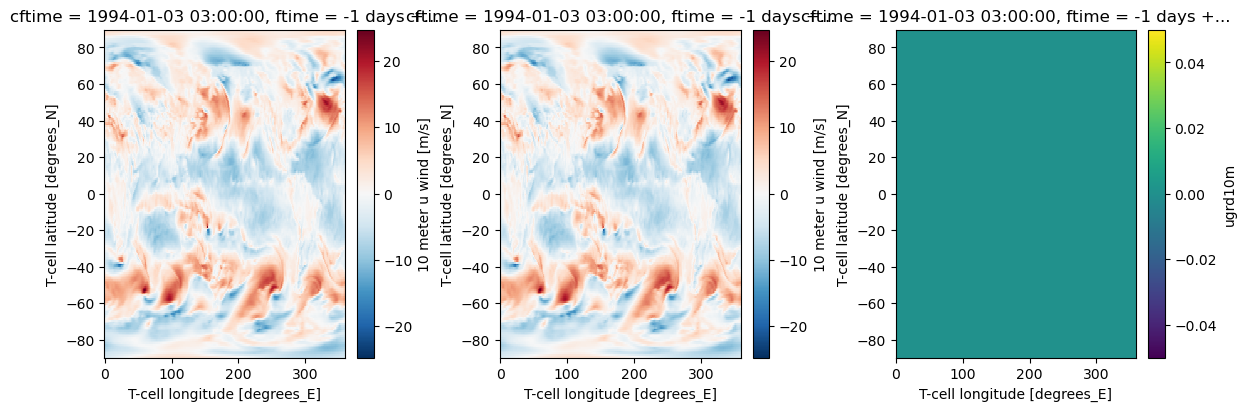

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)

for xds, ax in zip([ds1, ds2, ds2-ds1], axs):
    plotme = xds["ugrd10m"].sel(time="1994-01-03T03")
    plotme.plot(ax=ax)

In [11]:
for key in ds1.data_vars:
    err = np.abs(ds1[key] - ds2[key]).max().values
    print(f"{key:<10s} max error = {err:.2f}") 

clwmr      max error = 0.00
dpres      max error = 0.00
f10m       max error = 0.00
grle       max error = 0.00
icec       max error = 0.00
icmr       max error = 0.00
land       max error = 0.00
nicp       max error = 0.00
ntrnc      max error = 0.00
o3mr       max error = 0.00
prateb_ave max error = 0.00
pressfc    max error = 0.00
rwmr       max error = 0.00
sfcr       max error = 0.00
snmr       max error = 0.00
snod       max error = 0.00
soill1     max error = 0.00
soill2     max error = 0.00
soill3     max error = 0.00
soill4     max error = 0.00
soilt1     max error = 0.00
soilt2     max error = 0.00
soilt3     max error = 0.00
soilt4     max error = 0.00
soilw1     max error = 0.00
soilw2     max error = 0.00
soilw3     max error = 0.00
soilw4     max error = 0.00
sotyp      max error = 0.00
spfh       max error = 0.00
tmp        max error = 0.00
tmp2m      max error = 0.00
tmpsfc     max error = 0.00
ugrd       max error = 0.00
ugrd10m    max error = 0.00
veg        max error

That is what we call verified.